In [1]:
#Hanlde DataFrame
import pandas as pd
import os

#Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV

#analyse result
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time

In [2]:
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


In [3]:
df = df.drop_duplicates()
df.groupby('Sentiment').describe()
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=20)
x = vectorizer.fit_transform(df['Text'])
y = df['Sentiment']
text = vectorizer.transform(['The long l3ines   and; pOOr customer# service really turned me off...123.'])
text = vectorizer.inverse_transform(text)
print(text)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)  

[array(['service'], dtype='<U17')]


# Regression

{'C': 1}
The accuracy of the model is: 0.937799043062201
time: 5.920072078704834


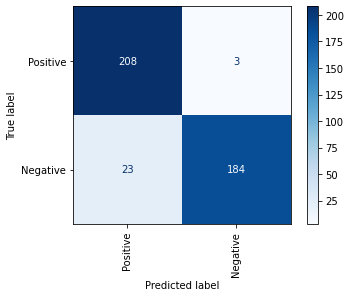

In [4]:
start = time.time()
model = LogisticRegression(max_iter=1000, random_state=0)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
end = time.time()
print("time:",end - start)

# KNN

{'n_neighbors': 7, 'weights': 'distance'}
The accuracy of the model is: 0.9593301435406698
time: 5.377287864685059


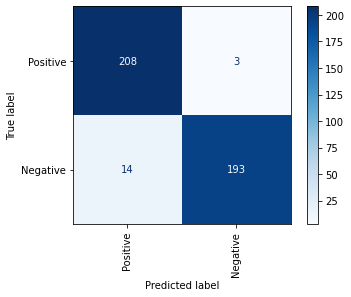

In [5]:
start = time.time()
model=KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
end = time.time()
print("time:",end - start)

# RF

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
The accuracy of the model is: 0.9688995215311005
time: 1159.3052911758423


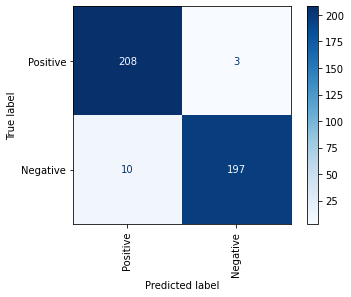

In [6]:
start = time.time()
model = RandomForestClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
end = time.time()
print("time:",end - start)

# GXBOOST

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
The accuracy of the model is: 0.9593301435406698
time: 618.1844201087952


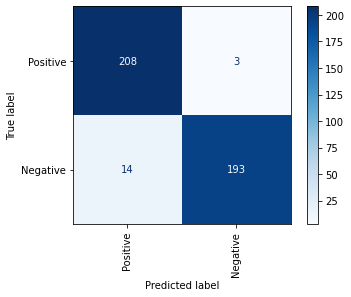

In [7]:
start = time.time()
model=XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
end = time.time()
print("time:",end - start)

# SVM

{'C': 10, 'kernel': 'rbf'}
The accuracy of the model is: 0.9593301435406698
time: 58.1085991859436


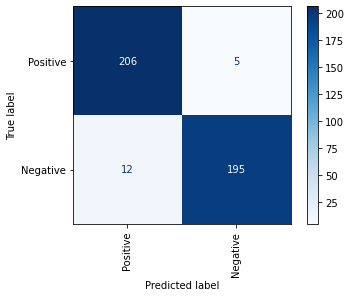

In [8]:
start = time.time()
model= SVC(probability=True)
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10]
}

#`grid_search` performs a grid search with 5-fold cross-validation and evaluates models based on accuracy.
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

#`fit` method fits the model to the training data, systematically trying out all parameter combinations.
grid_search.fit(x_train, y_train)

#`best_params` and `best_score` store the best hyperparameters and their corresponding accuracy score.
best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

#The `model` is updated with the best estimator found during the grid search, which can be used for further analysis.
model = grid_search.best_estimator_

cmd.from_estimator(model, x_test, y_test,display_labels=['Positive','Negative'],cmap='Blues', xticks_rotation='vertical')

#calculate accuracy
print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test))))
end = time.time()
print("time:",end - start)